# 07 — Cizalla (Shear) y Espejo (Mirror) en 2D

## Teoría (matrices 2×2)

### Cizalla (Shear)
- **Cizalla horizontal** (desplaza en $(x)$ proporcional a $(y)$):
$
\mathbf{S}_x(k)=
\begin{bmatrix}
1 & k\\
0 & 1
\end{bmatrix},\quad
\begin{bmatrix}x_2\\y_2\end{bmatrix}
=
\begin{bmatrix}
1 & k\\
0 & 1
\end{bmatrix}
\begin{bmatrix}x_1\\y_1\end{bmatrix}
=
\begin{bmatrix}
x_1 + k\,y_1\\
y_1
\end{bmatrix}.
$

- **Cizalla vertical** (desplaza en $(y)$ proporcional a $(x)$):
$
\mathbf{S}_y(k)=
\begin{bmatrix}
1 & 0\\
k & 1
\end{bmatrix}$,$\quad$
$\begin{bmatrix}x_2\\y_2\end{bmatrix}$
=
$\begin{bmatrix}
1 & 0\\
k & 1
\end{bmatrix}$
$\begin{bmatrix}x_1\\y_1\end{bmatrix}$
=
$\begin{bmatrix}
x_1\\
k\,x_1 + y_1
\end{bmatrix}.
$

### Espejo (Reflexión)
- **Espejo alrededor del eje $(y)$** (refleja $(x\to -x)$):
$
\mathbf{R}_y=
\begin{bmatrix}
-1 & 0\\
\phantom{-}0 & 1
\end{bmatrix}.
$

- **Espejo alrededor del eje $(x)$** (refleja $(y\to -y$)):
$
\mathbf{R}_x=
\begin{bmatrix}
1 & \phantom{-}0\\
0 & -1
\end{bmatrix}.
$

> **Nota sobre imágenes:** El origen de imagen es la esquina superior izquierda y $(y)$ crece hacia abajo.
> Para aplicar estas transformaciones alrededor del **centro** de la imagen (y no de la esquina),
> usaremos `warpAffine` con una columna de traslación $((t_x, t_y)$) que reubique el centro.


## Implementación en OpenCV

Usaremos `lenna.png` con la misma ruta de los notebooks anteriores y aplicaremos:
- Cizalla **horizontal** y **vertical** alrededor del **centro**.
- Espejo **alrededor de Y** y **alrededor de X** alrededor del **centro**.


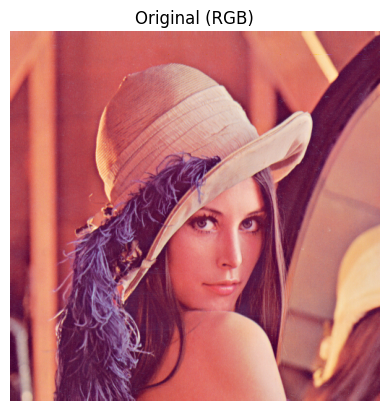

In [1]:
# ✅ Importar librerías y cargar imagen
import cv2
import numpy as np
import matplotlib.pyplot as plt

# MISMA ruta usada antes
img_bgr = cv2.imread(r"C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna.png")  # Cambia si es necesario

if img_bgr is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h, w = img_rgb.shape[:2]
cx, cy = (w - 1) / 2.0, (h - 1) / 2.0

plt.imshow(img_rgb); plt.title("Original (RGB)"); plt.axis("off"); plt.show()


### A) Cizalla horizontal $( \mathbf{S}_x(k) $) centrada

Para cizallar alrededor del **centro** $((c_x,c_y)$), componemos:
1. Trasladar el centro al origen.
2. Aplicar $( \mathbf{S}_x(k) $).
3. Regresar al centro.

En forma afín 2×3:
$
\mathbf{M} =
\begin{bmatrix}
1 & k & t_x\\
0 & 1 & t_y
\end{bmatrix},\quad
t_x = c_x - (1)\,c_x - k\,c_y = -k\,c_y,\quad
t_y = c_y - (0)\,c_x - (1)\,c_y = 0.
$

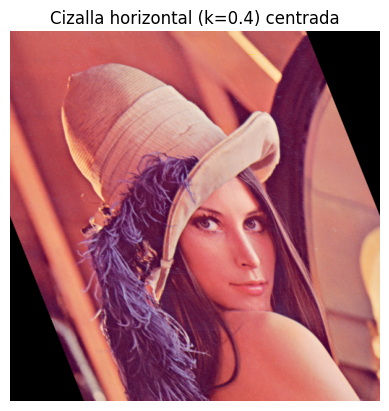

In [2]:
k = 0.4  # factor de cizalla horizontal
tx = -k * cy
ty = 0.0

Mx = np.float32([[1, k, tx],
                 [0, 1, ty]])

shear_x = cv2.warpAffine(img_rgb, Mx, (w, h), flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(shear_x); plt.title(f"Cizalla horizontal (k={k}) centrada"); plt.axis("off"); plt.show()


### B) Cizalla vertical $( \mathbf{S}_y(k) )$ centrada

Análogo al caso anterior, la traslación se obtiene de:
$
\mathbf{M} =
\begin{bmatrix}
1 & 0 & t_x\\
k & 1 & t_y
\end{bmatrix},\quad
t_x = c_x - (1)\,c_x - (0)\,c_y = 0,\quad
t_y = c_y - k\,c_x - (1)\,c_y = -k\,c_x.
$

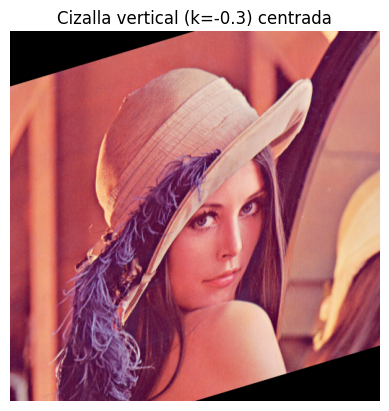

In [3]:
k2 = -0.3  # factor de cizalla vertical (negativo para inclinar al otro lado)
tx2 = 0.0
ty2 = -k2 * cx

My = np.float32([[1, 0, tx2],
                 [k2, 1, ty2]])

shear_y = cv2.warpAffine(img_rgb, My, (w, h), flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(shear_y); plt.title(f"Cizalla vertical (k={k2}) centrada"); plt.axis("off"); plt.show()


### C) Espejo alrededor de $(y$) (reflexión $(x\to -x$)) centrado

Reflexión ideal: $( \mathbf{R}_y = \begin{bmatrix}-1 & 0\\ 0 & 1\end{bmatrix} )$.  
Para que actúe respecto al **centro** $((c_x,c_y))$, la traslación queda:
$
\mathbf{M} =
\begin{bmatrix}
-1 & 0 & t_x\\
\phantom{-}0 & 1 & t_y
\end{bmatrix},\quad
t_x = c_x - (-1)\,c_x = 2c_x,\quad
t_y = c_y - (1)\,c_y = 0.
$

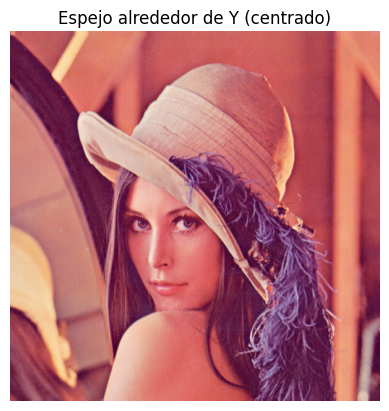

In [4]:
tx_y = 2.0 * cx
ty_y = 0.0

Ry = np.float32([[-1, 0, tx_y],
                 [ 0, 1, ty_y]])

mirror_y = cv2.warpAffine(img_rgb, Ry, (w, h), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(mirror_y); plt.title("Espejo alrededor de Y (centrado)"); plt.axis("off"); plt.show()


### D) Espejo alrededor de $(x)$ (reflexión $(y\to -y$))$ centrado

Reflexión ideal: $( \mathbf{R}_x = \begin{bmatrix}1 & 0\\ 0 & -1\end{bmatrix} $).  
Para que actúe respecto al **centro** $((c_x,c_y)$):
$
\mathbf{M} =
\begin{bmatrix}
1 & 0 & t_x\\
0 & -1 & t_y
\end{bmatrix},\quad
t_x = c_x - (1)\,c_x = 0,\quad
t_y = c_y - (-1)\,c_y = 2c_y.
$

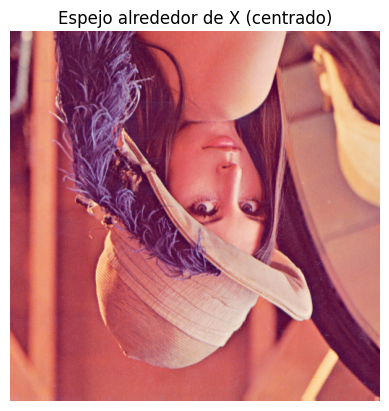

In [5]:
tx_x = 0.0
ty_x = 2.0 * cy

Rx = np.float32([[ 1, 0, tx_x],
                 [ 0,-1, ty_x]])

mirror_x = cv2.warpAffine(img_rgb, Rx, (w, h), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(mirror_x); plt.title("Espejo alrededor de X (centrado)"); plt.axis("off"); plt.show()


### Guardado (opcional) en la misma carpeta de la imagen original
Se agregan sufijos al nombre del archivo.


In [6]:
import os

img_path = r"C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna.png"
carpeta = os.path.dirname(img_path)
nombre, ext = os.path.splitext(os.path.basename(img_path))

cv2.imwrite(os.path.join(carpeta, f"{nombre}_shear_x{ext}"), cv2.cvtColor(shear_x, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(carpeta, f"{nombre}_shear_y{ext}"), cv2.cvtColor(shear_y, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(carpeta, f"{nombre}_mirror_y{ext}"), cv2.cvtColor(mirror_y, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(carpeta, f"{nombre}_mirror_x{ext}"), cv2.cvtColor(mirror_x, cv2.COLOR_RGB2BGR))
print("✅ Resultados guardados en la carpeta de la imagen original.")


✅ Resultados guardados en la carpeta de la imagen original.


## Aplicaciones en robótica

- **Deskew** (corrección de inclinación) para **OCR** o lectura de etiquetas/códigos en líneas de producción.  
- **Rectificación** aproximada de vistas oblicuas en pisos/planos cuando la homografía completa no es necesaria.  
- **Ajuste fino de alineación** en registro de imágenes cuando hay pequeñas cizallas por perspectiva.  
- **Data augmentation**: generar ejemplos con inclinaciones o espejos para robustecer detectores y segmentadores.  
- **Verificación de simetrías** en inspección: espejos alrededor de ejes para pruebas de tolerancia.  
